In [1]:
# Install CUML, as specified in
# https://colab.research.google.com/drive/1rY7Ln6rEE1pOlfSHCYOVaqt8OvDO35J0#forceEdit=true&sandboxMode=true&scrollTo=m0jdXBRiDSzj
# As suggested in 
# https://medium.com/rapids-ai/tsne-with-gpus-hours-to-seconds-9d9c17c941db

In [ ]:
# New CUML installation colab script:
# https://colab.research.google.com/drive/1TAAi_szMfWqRfHVfjGSqnGVLr_ztzUM9?usp=sharing#scrollTo=G_2dancFhf70

In [4]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

fatal: destination path 'rapidsai-csp-utils' already exists and is not an empty directory.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla P100-PCIE-16GB!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu bionic InRelease [20.8 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:12 http://ppa.launchpad.net/c2d4u.team/c2d4u4.

In [1]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:28
🔁 Restarting kernel...


In [ ]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

In [1]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# The <packages> option are default blank or 'core'.  By default, we install RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and not include BlazingSQL, 
!python rapidsai-csp-utils/colab/install_rapids.py stable

Installing RAPIDS Stable 0.19
Starting the RAPIDS+BlazingSQL install on Colab.  This will take about 15 minutes.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.0
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids-blazing=0.19


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    abseil-cpp-20200923.3      |       h9c3ff4c_0         955 KB  conda-forge
    aiohttp-3.7.4.post0        |   py37h5e8e339_0         625 KB  conda-forge
    alsa-lib-1.2.3             |       h516909a_0         560 KB  conda-forge
    anyio-3.1.0                |   py37h89c1867_0        

In [37]:
from pathlib import Path
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from cuml.manifold import TSNE
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = Path('/content/gdrive/My Drive/')

Mounted at /content/gdrive


In [4]:
import pickle

def pkl_save(path, obj):
  with open(path, 'wb') as file:
    pickle.dump(obj, file)

def pkl_load(path):
  with open(path, 'rb') as file:
    return pickle.load(file)

In [106]:
logits_country = pkl_load(root_dir/'logits_country')
logits_geocell = pkl_load(root_dir/'logits_geocell')
logits_us = pkl_load(root_dir/'logits_us')

In [126]:
logits = torch.cat([logits_us], 1)
logits.shape

torch.Size([97068, 50])

In [127]:
%time logits_tsne = TSNE().fit_transform(logits.numpy())

[W] [15:49:16.656038] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
CPU times: user 2.08 s, sys: 2.02 s, total: 4.1 s
Wall time: 4.08 s


In [128]:
# Unneeded - CURL TSNE is so fast!
# pca = PCA(n_components=0.95)
# logits_pca = pca.fit_transform(logits)
# logits_pca.shape # Nice! About 1/6
#
# %time logits_pca_tsne = TSNE().fit_transform(logits_pca)

In [129]:
data = pd.read_csv(root_dir/'data.csv')
data['tsne_0'] = logits_tsne[:,0]
data['tsne_1'] = logits_tsne[:,1]

In [136]:
# Helpful to choose countries of similar size
data.groupby(['country_name', 'country']).id.count().sort_values(ascending=False).iloc[:40]

country_name        country
United States       us         19007
France              fr          6117
Russian Federation  ru          5399
Japan               jp          5161
United Kingdom      gb          4825
Brazil              br          4442
Canada              ca          3624
Mexico              mx          3480
Spain               es          3267
Australia           au          3246
South Africa        za          2437
Italy               it          1947
Norway              no          1897
Poland              pl          1732
Finland             fi          1723
Sweden              se          1640
Argentina           ar          1538
Thailand            th          1371
Romania             ro          1163
New Zealand         nz          1139
Netherlands         nl          1036
Turkey              tr           915
Indonesia           id           835
Portugal            pt           757
Chile               cl           752
India               in           740
Bulgaria  

In [131]:
data.country_name = data.country_name.str.replace("Taiwan, Province of China", "Taiwan")

In [132]:
def make_data(countries):
  ds = []
  for c in countries:
    ds.append(data[data.country==c])
  return pd.concat(ds)

In [150]:
def make_plot(countries, save_path=None):
  plt.figure(figsize=(7,5))
  sns.scatterplot(
      data=make_data(countries),
      x='tsne_0',
      y='tsne_1',
      hue='country_name',
  )
  plt.xticks([])
  plt.yticks([])
  plt.xlabel('')
  plt.ylabel('')
  plt.gca().legend().set_title('')
  plt.show()
  plt.pause(0.001)
  if save_path:
    plt.savefig(root_dir/save_path)

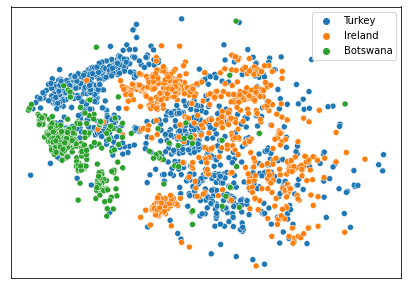

<Figure size 432x288 with 0 Axes>

In [151]:
# What this is:
# 1. Cluster all the countries based *only* on US logits
# 2. Visualize the result for these three countries
make_plot(['tr', 'ie', 'bw'], save_path='cluster_tr_ie_bw')

In [152]:
# High-accuracy countries
hi = ['no', 'fi', 'au', 'za', 'ar', 'br', 'th']

# Low-accuracy countries
lo = ['tr', 'gr', 'ie', 'gb']